## Ex 10.1

In [ ]:
import cv2
save_folder = "do_not_git_push_2"
vidcap = cv2.VideoCapture('data/bacteriagrowth.mp4')
success,image = vidcap.read()
count = 0
success = True
while success:
    cv2.imwrite(save_folder+"/frame%d.png" % count, image)
    success,image = vidcap.read()
    count += 1

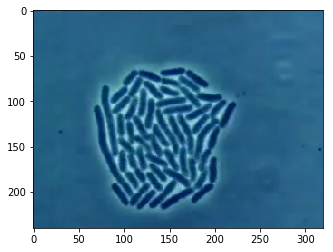

In [8]:
import matplotlib.pyplot as plt
import skimage.io
import numpy as np

im = skimage.io.imread('do_not_git_push_2/frame60.png')
plt.imshow(im)
plt.show()

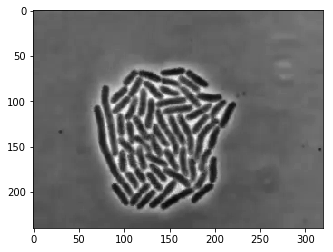

In [5]:
gray_im = skimage.color.rgb2gray(im)
plt.imshow(gray_im, cmap="gray")
plt.show()

In [6]:
from skimage.filters import threshold_otsu
thresh = threshold_otsu(gray_im)

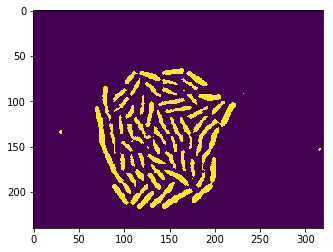

In [7]:
from skimage.morphology import closing
TF_im = closing(gray_im < 0.25)
plt.imshow(TF_im)
plt.show()

In [9]:
bacteria_size = np.zeros(66)
x_val = np.zeros(66)
for i in range(0, 66):
    im = skimage.io.imread('do_not_git_push_2/frame'+str(i)+'.png')
    gray_im = skimage.color.rgb2gray(im)
    TF_im = closing(gray_im < 0.25)
    bacteria_size[i] = np.sum(TF_im*1)
    x_val[i] = i

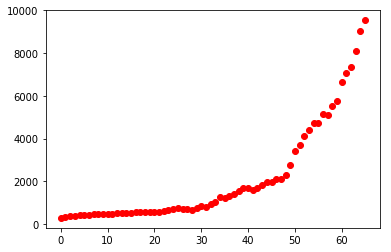

In [10]:
plt.plot(x_val, bacteria_size,"ro")
plt.show()

In [53]:
from scipy import optimize
from functools import partial

def f(x, A, B):
    return A*np.exp(B*x)

def error(paramters, x_values, y_values):
    total_error = 0
    for i in range(0, len(x_values)):
        total_error += abs(y_values[i] - f(x_values[i], paramters[0], paramters[1]))
    return total_error

In [60]:
baked_error = partial(error, x_values=x_val, y_values=bacteria_size)
results = optimize.minimize(baked_error, [10, 0.1])
print(results.x[0],results.x[1])

115.76116290658778 0.06745444240485472


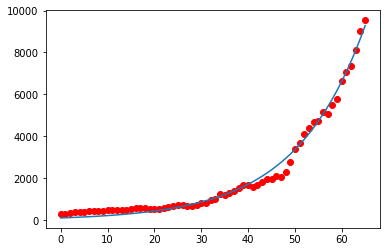

In [61]:
plt.plot(x_val, bacteria_size,"ro")
plt.plot(x_val, f(x_val, results.x[0], results.x[1]))
plt.show()